## Questions that I would like to explore:
    
#### 1.  What are the distributions of orders by day of the week, hour of the day?
#### 2. Reorder Interval  - How often do customers put in a new order? Distribution of the reorder interval?
#### 3. What are the top products, aisles, departments ordered?
#### 4. What are the types of products reordered? Are there differences between products re ordered within a week compared to within a month? 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### Load data: 
aisles = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/aisles.csv')
departments = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/departments.csv')
orders = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/orders.csv')
products = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/products.csv')
orderproducts_prior = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/order_products__prior.csv')
orderproducts_train = pd.read_csv('/Users/Gemy/Desktop/SPRING BOARD/Instacart Capstone/all/order_products__train.csv')

In [5]:
## Explore orders by day and hours of the day in the Orders dataset:
orders. head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


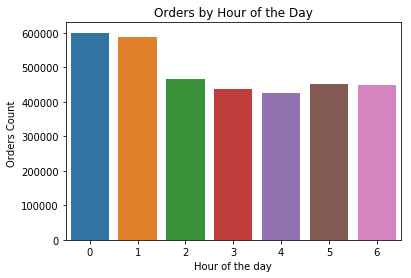

In [6]:
## Orders by Hour of the day
sns.countplot(data = orders, x ='order_dow')
plt.xlabel('Hour of the day')
plt.ylabel('Orders Count ')
plt.title('Orders by Hour of the Day')
plt.show()

#### 0, 1 in the plot denotes Saturday and Sunday. Plot shows that most orders happen on the weekends, and lower during the weekdays especially Wednesday 


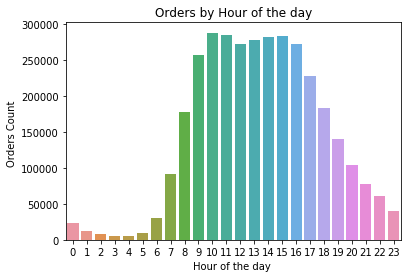

In [7]:
## Orders by Hour of the day 
sns.countplot(data = orders, x ='order_hour_of_day')
plt.xlabel('Hour of the day ')
plt.ylabel('Orders Count ')
plt.title('Orders by Hour of the day')
plt.show()

#### Most orders happen during the day between 10:00 and 16:00

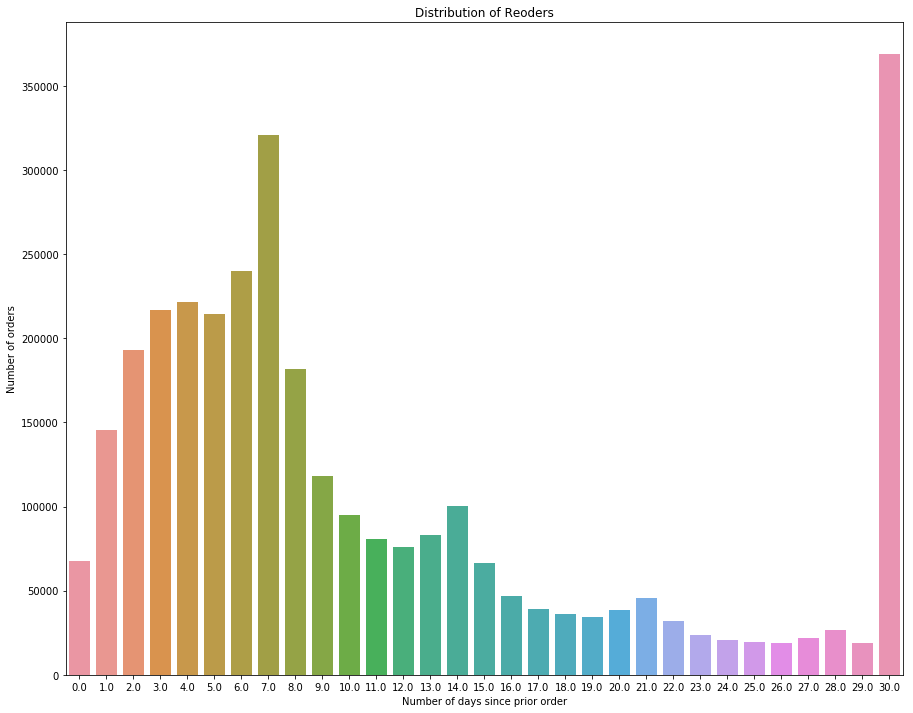

In [8]:
## Explore the distribution of days since prior order:
plt.subplots(figsize=(15, 12))
sns.countplot(data =orders, x='days_since_prior_order')
plt.xlabel('Number of days since prior order')
plt.ylabel('Number of orders')
plt.title('Distribution of Reoders')
plt.show()


#### We can see that the highest number of reorders are within 7 days or a month. It would be more insightful to dive deeper to see what products are reordered within a week vs within a month.

In [9]:
### Inorder to gain more insights into the order_products_ prior dataset, we need to merge
###information from orders, products, departments and aisles dataset, matching on product ID, aisle ID, department ID: 

df = pd.merge(orderproducts_prior, products, on ='product_id', how='left')
df = pd.merge(df, aisles, on ='aisle_id', how='left')
df = pd.merge(df, departments, on ='department_id', how='left')
df = pd.merge(df, orders, on ='order_id', how='left' )

In [10]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [11]:
## Best selling departments, sales in each department
bs= df.groupby('department')['order_id'].count().reset_index()
bs.columns = ['department','total_orders']

In [12]:
bs_plot = bs.sort_values(by='total_orders', ascending=False)

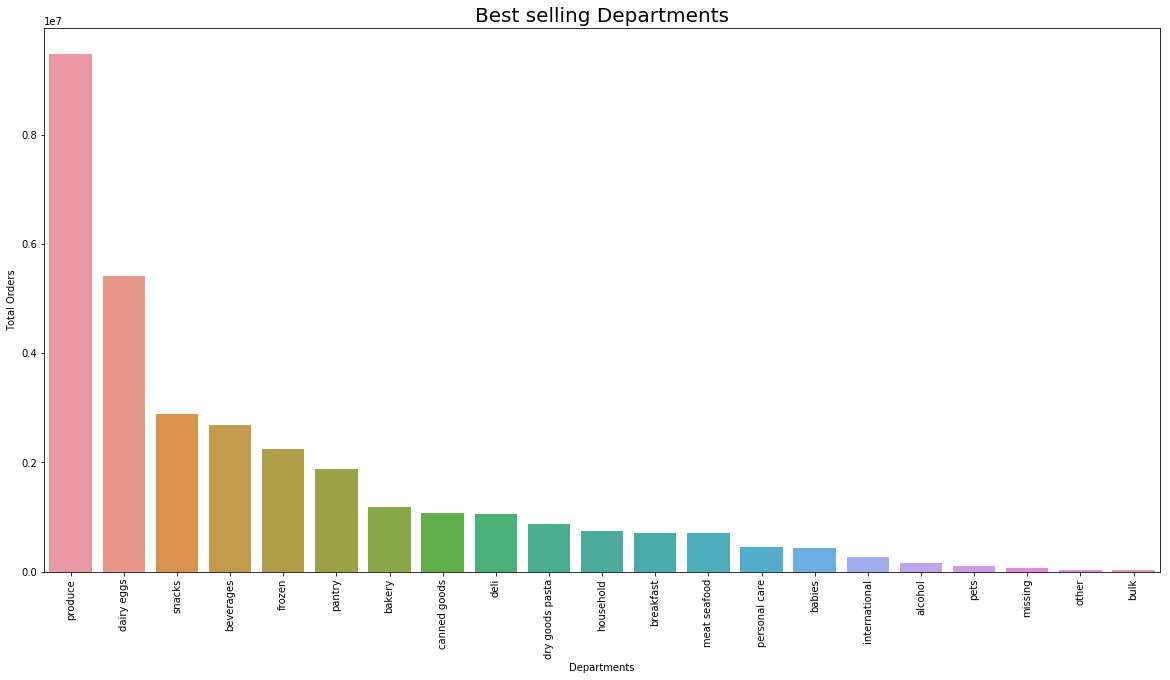

In [13]:
plt.subplots(figsize=(20,10))
plt.xticks(rotation = 'vertical')
sns.barplot(bs_plot.department, bs_plot.total_orders)
plt.xlabel('Departments')
plt.ylabel('Total Orders')
plt.title('Best selling Departments', fontsize= 20)
plt.show()

In [14]:
## We can see that the department Produce seem to generate the highest number of sales. 
## I am curious to see what kinds of products are included in the Produce Department
df.aisle[df['department']=='produce'].unique()

array(['fresh vegetables', 'packaged vegetables fruits', 'fresh fruits',
       'packaged produce', 'fresh herbs'], dtype=object)

### Exploring reorder patterns: 
Earlier we saw that most reorders are within 7 days or 30 days.  I want to compare the types of products re-ordered. 
Will there be a difference in the types of products reordered within 7 days compared to 30 days.


In [23]:

## Aggregate by days since prior order and aisle and count the number of orders:
bsr = df.groupby(['days_since_prior_order','aisle'])['order_id'].count().reset_index()
bsr.columns = ['days since prior order', 'aisle', 'total orders']
bsr = bsr.sort_values(by='days since prior order', ascending=False)
bsr.head()


,days since prior order,aisle,total orders
4153,30.0,yogurt,125720
4069,30.0,fresh dips tapenades,35848
4055,30.0,diapers wipes,2119
4056,30.0,digestion,2679
4057,30.0,dish detergents,9702


In [24]:
##Looking at the 30 day re-order lists of aisles:
bsr_30=bsr[bsr['days since prior order']==30].sort_values(by='total orders', ascending = False)

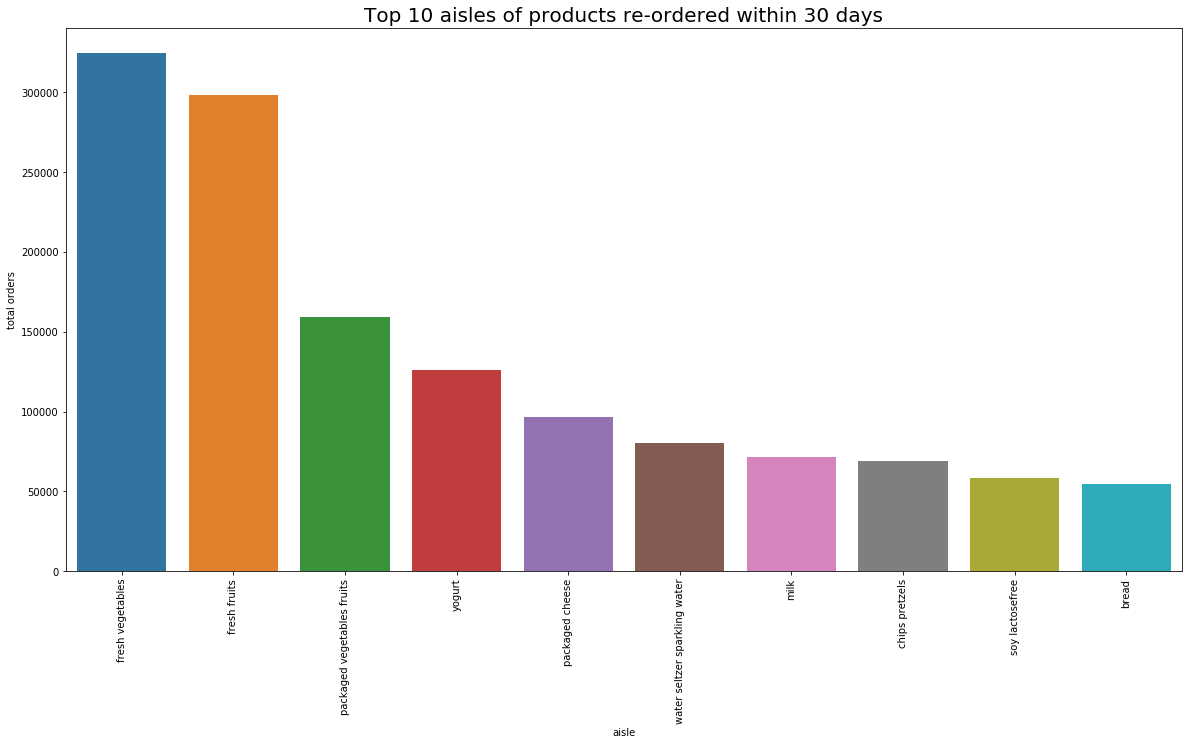

In [25]:
## Plot top 10 products reordered within the 30 day re-order interval
plt.subplots(figsize=(20,10))
plt.xticks(rotation = 'vertical')
plt.title('Top 10 aisles of products re-ordered within 30 days', fontsize=20)
sns.barplot(bsr_30.aisle.head(10), bsr_30['total orders'])

In [26]:
bsr_7=bsr[bsr['days since prior order']==7].sort_values(by='total orders', ascending = False)

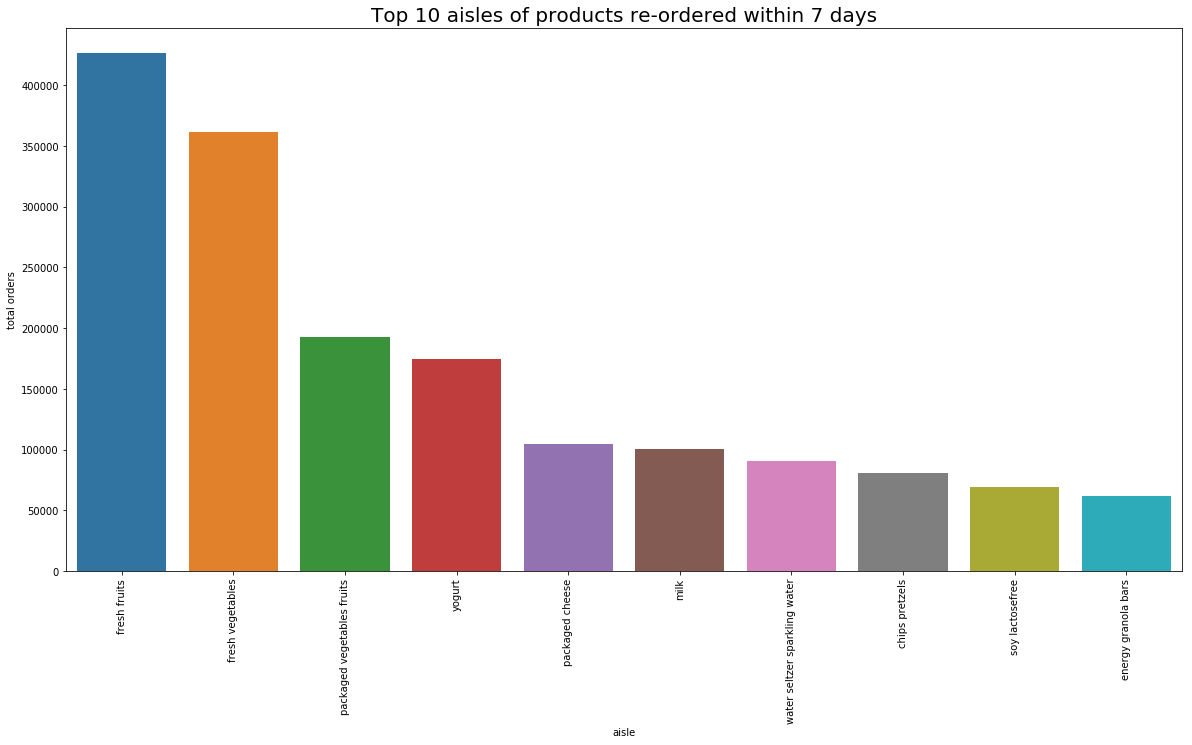

In [27]:
plt.subplots(figsize=(20,10))
plt.xticks(rotation = 'vertical')
plt.title('Top 10 aisles of products re-ordered within 7 days', fontsize=20)
sns.barplot(bsr_7.aisle.head(10), bsr_7['total orders'])

### It is fascinating to see that there is a similar patterns of products reordered: fresh fruits and fresh vegetables, yogurt are among the top products reordered regardless of 7 days or 30 days 